In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Raktikum_ML/Praktikum04/Data/calonpembelimobil.csv')
display(df.head())

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ID              1000 non-null   int64
 1   Usia            1000 non-null   int64
 2   Status          1000 non-null   int64
 3   Kelamin         1000 non-null   int64
 4   Memiliki_Mobil  1000 non-null   int64
 5   Penghasilan     1000 non-null   int64
 6   Beli_Mobil      1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


In [4]:
# cek missing value
df.isnull().sum()

,0
ID,0
Usia,0
Status,0
Kelamin,0
Memiliki_Mobil,0
Penghasilan,0
Beli_Mobil,0


In [9]:
# 1. Mapping kolom Kelamin -> biner
# Misal: 1 = Laki-laki, 0 = Perempuan
map_kelamin = {1: 1, 0: 0}
df['JK_bin'] = df['Kelamin'].map(map_kelamin)

# 2. (Opsional) Mapping kolom Status -> kategori biner
# Misal: 1 = lajang, 2 = menikah
# Jika ingin kelompokkan: menikah (2,3) = 1; lajang (1) = 0
df['Status_bin'] = df['Status'].map({1: 0, 2: 1, 3: 1})

# 3. (Opsional) Kolom target 'Beli_Mobil' sudah biner, jadi tidak perlu diubah
# Pastikan kolom target adalah 0 dan 1
print("Distribusi JK_bin:\n", df['JK_bin'].value_counts())
print("\nDistribusi Status_bin:\n", df['Status_bin'].value_counts())
print("\nDistribusi Target (Beli_Mobil):\n", df['Beli_Mobil'].value_counts())


Distribusi JK_bin:
 JK_bin
0    519
1    481
Name: count, dtype: int64

Distribusi Status_bin:
 Status_bin
1.0    498
0.0    262
Name: count, dtype: int64

Distribusi Target (Beli_Mobil):
 Beli_Mobil
1    633
0    367
Name: count, dtype: int64


In [10]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil,JK_bin,Status_bin
ID,1.000000,0.149779,-0.006634,0.014646,0.068555,0.254177,0.168614,0.014646,0.037266
Usia,0.149779,1.000000,0.051476,0.019454,0.090926,0.125859,0.100127,0.019454,0.060514
Status,-0.006634,0.051476,1.000000,-0.008561,0.048302,0.071714,0.048584,-0.008561,0.860839
Kelamin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301,1.000000,0.024491
Memiliki_Mobil,0.068555,0.090926,0.048302,0.035199,1.000000,0.137823,0.102005,0.035199,0.084535
Penghasilan,0.254177,0.125859,0.071714,-0.054211,0.137823,1.000000,0.763930,-0.054211,0.058317
Beli_Mobil,0.168614,0.100127,0.048584,-0.147301,0.102005,0.763930,1.000000,-0.147301,0.005117
JK_bin,0.014646,0.019454,-0.008561,1.000000,0.035199,-0.054211,-0.147301,1.000000,0.024491
Status_bin,0.037266,0.060514,0.860839,0.024491,0.084535,0.058317,0.005117,0.024491,1.000000


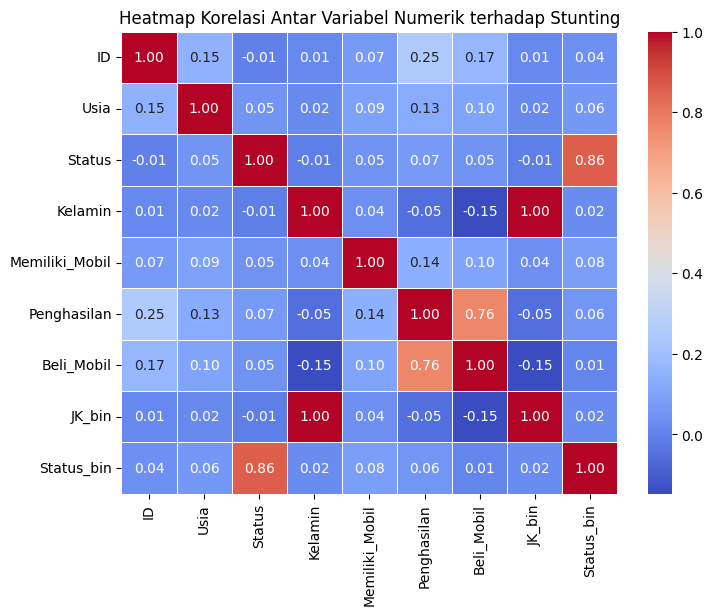

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik terhadap Stunting", fontsize=12)
plt.show()

In [12]:
# Tentukan fitur numerik dan biner
feature_num = ['Usia', 'Status', 'Memiliki_Mobil', 'Penghasilan']
feature_bin = ['JK_bin']

# Gabungkan semua fitur + kolom target
use_cols = feature_num + feature_bin + ['Beli_Mobil']

# Buat salinan DataFrame tanpa nilai kosong
df_model = df[use_cols].dropna().copy()

# Pisahkan fitur (X) dan target (y)
X = df_model[feature_num + feature_bin]
y = df_model['Beli_Mobil']

# Cek ukuran data
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1000, 5)
y shape: (1000,)


In [14]:
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Tampilkan ukuran data hasil pembagian
print("Data latih (X_train):", X_train.shape)
print("Data uji (X_test):", X_test.shape)
print("Data latih (y_train):", y_train.shape)
print("Data uji (y_test):", y_test.shape)


Data latih (X_train): (800, 5)
Data uji (X_test): (200, 5)
Data latih (y_train): (800,)
Data uji (y_test): (200,)


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Tentukan kolom numerik dan biner (sesuai dataset)
feature_num = ['Usia', 'Status', 'Memiliki_Mobil', 'Penghasilan']
feature_bin = ['JK_bin']

# Preprocessing
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), feature_num),
        ('bin', 'passthrough', feature_bin)
    ],
    remainder='drop'  # Kolom lain diabaikan
)

# Model Logistic Regression
model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    class_weight='balanced',
    random_state=42
)

# Pipeline (gabung preprocessing + model)
clf = Pipeline([
    ('preprocess', preprocess),
    ('model', model)
])

# Latih model dengan data training
clf.fit(X_train, y_train)

print("☑️ Model Logistic Regression berhasil dilatih.")



☑️ Model Logistic Regression berhasil dilatih.


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Prediksi hasil pada data uji
y_pred = clf.predict(X_test)

# Prediksi probabilitas kelas positif (Beli_Mobil = 1)
y_prob = clf.predict_proba(X_test)[:, 1]

# Tampilkan hasil evaluasi model
print("📊 HASIL EVALUASI MODEL LOGISTIC REGRESSION 📊")
print(f"Akurasi   : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision : {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall    : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score  : {f1_score(y_test, y_pred, zero_division=0):.4f}")
print(f"ROC-AUC   : {roc_auc_score(y_test, y_prob):.4f}")


📊 HASIL EVALUASI MODEL LOGISTIC REGRESSION 📊
Akurasi   : 0.9300
Precision : 0.9829
Recall    : 0.9055
F1 Score  : 0.9426
ROC-AUC   : 0.9769


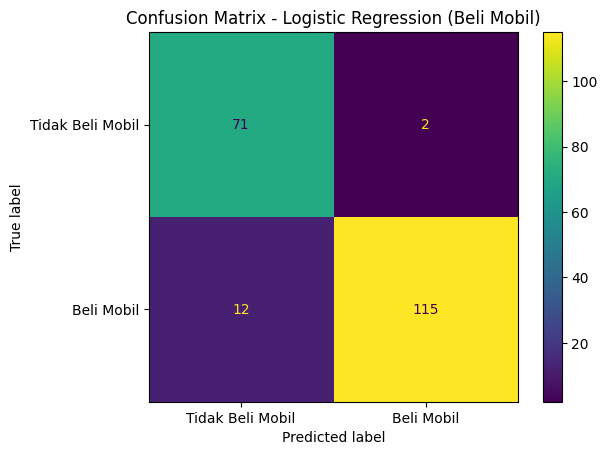

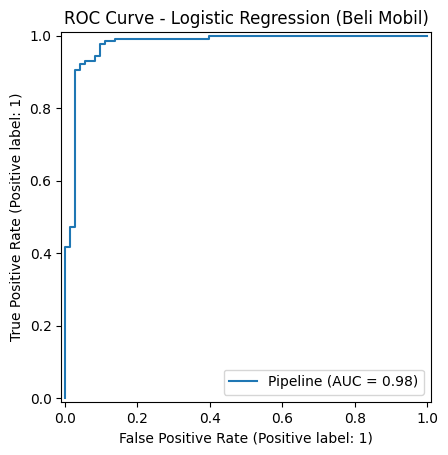

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
ConfusionMatrixDisplay(
    confusion_matrix(y_test, y_pred),
    display_labels=['Tidak Beli Mobil', 'Beli Mobil']
).plot(values_format='d')

plt.title("Confusion Matrix - Logistic Regression (Beli Mobil)")
plt.show()

# ROC Curve
RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.title("ROC Curve - Logistic Regression (Beli Mobil)")
plt.show()


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['Tidak Stunting(0)', 'stunting(1)']))

                   precision    recall  f1-score   support

Tidak Stunting(0)       0.86      0.97      0.91        73
      stunting(1)       0.98      0.91      0.94       127

         accuracy                           0.93       200
        macro avg       0.92      0.94      0.93       200
     weighted avg       0.94      0.93      0.93       200



In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Evaluasi model dengan 5-Fold Cross Validation
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

# Tampilkan hasil evaluasi
print(" HASIL CROSS VALIDATION (5-FOLD) ")
print("Skor akurasi tiap fold :", scores)
print(f"Rata-rata akurasi      : {np.mean(scores):.4f}")
print(f"Standar deviasi         : {np.std(scores):.4f}")


 HASIL CROSS VALIDATION (5-FOLD) 
Skor akurasi tiap fold : [0.775 0.915 0.955 0.945 0.94 ]
Rata-rata akurasi      : 0.9060
Standar deviasi         : 0.0668


In [22]:
import pandas as pd
import numpy as np

# Gabungkan nama fitur numerik & biner
feat_names = feature_num + feature_bin

# Ambil koefisien dari model Logistic Regression
coefs = clf.named_steps['model'].coef_[0]

# Hitung odds ratio (e^koefisien)
odds = np.exp(coefs)

# Buat DataFrame hasil analisis koefisien
coef_df = pd.DataFrame({
    'Fitur': feat_names,
    'Koefisien (log-odds)': coefs,
    'Odds Ratio (e^coef)': odds
}).sort_values('Odds Ratio (e^coef)', ascending=False)

# Tampilkan hasil
display(coef_df)


,Fitur,Koefisien (log-odds),Odds Ratio (e^coef)
3,Penghasilan,4.553524,94.966518
2,Memiliki_Mobil,0.078348,1.081499
0,Usia,-0.047578,0.953536
1,Status,-0.133740,0.874818
4,JK_bin,-1.129122,0.323317


In [23]:
# Contoh data baru untuk prediksi
data_baru = pd.DataFrame({
    'Usia': [28, 40],
    'Status': [1, 0],
    'Memiliki_Mobil': [0, 1],
    'Penghasilan': [5000000, 12000000],
    'JK_bin': [1, 0]
})

# Prediksi menggunakan model yang sudah dilatih
pred = clf.predict(data_baru)
prob = clf.predict_proba(data_baru)[:, 1]

# Buat DataFrame hasil prediksi
hasil = data_baru.copy()
hasil['Prob_Beli_Mobil'] = prob
hasil['Pred (0=Tidak,1=Ya)'] = pred

# Tampilkan hasil prediksi
display(hasil)


,Usia,Status,Memiliki_Mobil,Penghasilan,JK_bin,Prob_Beli_Mobil,"Pred (0=Tidak,1=Ya)"
0,28,1,0,5000000,1,1.0,1
1,40,0,1,12000000,0,1.0,1
